In [ ]:
print("hello")

hello


In [ ]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

In [ ]:
from qiskit.circuit.quantumcircuit import string
from qiskit.circuit.quantumcircuitdata import QuantumCircuitData
#Oracle
def deutschejozsa_oracle(func,n):
  oracle_qc=QuantumCircuit(n+1)
#balanced input function

  if func=="balanced":
    #random input
    bit=np.random.randint(1,2**n)
    bitstring=format( bit, '0'+str(n)+'b')

    for qubit in range(len(bitstring)):
      if bitstring[qubit]=='1':
        oracle_qc.x(qubit)



    for qubit in range(n):
      oracle_qc.cx(qubit,n)

   

    for qubit in range(len(bitstring)):
      if bitstring[qubit]=='1':
        oracle_qc.x(qubit)

  if func=="constant":
    output = np.random.randint(2)
    if output == 1:
      oracle_qc.x(n)

#common gate for this oracle
  oracle_gate = oracle_qc.to_gate()
  oracle_gate.name = "Oracle"
  return oracle_gate

  








In [ ]:
def deutschejozsa_algorithm(oracle,n):
  algo_qc=QuantumCircuit(n+1,n)
#output set to |->
  algo_qc.x(n)
  algo_qc.h(n)

#input set to |+>
  for qubit in range(n):
    algo_qc.h(qubit)

  algo_qc.barrier()

#oracle gate
  algo_qc.append(oracle,range(n+1))

  algo_qc.barrier()

#input measurement
  for qubit in range(n):
    algo_qc.h(qubit)

  algo_qc.barrier()

  for i in range(n):
    algo_qc.measure(i,i)

  return algo_qc





In [ ]:
n=7
t=np.random.randint(2)
if t=="0":
  p="constant"
else:
  p="balanced"

oracle_gate=deutschejozsa_oracle(p,n)
circuit=deutschejozsa_algorithm(oracle_gate,n)
circuit.draw()

┌───┐      ░ ┌─────────┐ ░ ┌───┐ ░ ┌─┐                  
q_0: ┤ H ├──────░─┤0        ├─░─┤ H ├─░─┤M├──────────────────
     ├───┤      ░ │         │ ░ ├───┤ ░ └╥┘┌─┐               
q_1: ┤ H ├──────░─┤1        ├─░─┤ H ├─░──╫─┤M├───────────────
     ├───┤      ░ │         │ ░ ├───┤ ░  ║ └╥┘┌─┐            
q_2: ┤ H ├──────░─┤2        ├─░─┤ H ├─░──╫──╫─┤M├────────────
     ├───┤      ░ │         │ ░ ├───┤ ░  ║  ║ └╥┘┌─┐         
q_3: ┤ H ├──────░─┤3        ├─░─┤ H ├─░──╫──╫──╫─┤M├─────────
     ├───┤      ░ │  Oracle │ ░ ├───┤ ░  ║  ║  ║ └╥┘┌─┐      
q_4: ┤ H ├──────░─┤4        ├─░─┤ H ├─░──╫──╫──╫──╫─┤M├──────
     ├───┤      ░ │         │ ░ ├───┤ ░  ║  ║  ║  ║ └╥┘┌─┐   
q_5: ┤ H ├──────░─┤5        ├─░─┤ H ├─░──╫──╫──╫──╫──╫─┤M├───
     ├───┤      ░ │         │ ░ ├───┤ ░  ║  ║  ║  ║  ║ └╥┘┌─┐
q_6: ┤ H ├──────░─┤6        ├─░─┤ H ├─░──╫──╫──╫──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ │         │ ░ └───┘ ░  ║  ║  ║  ║  ║  ║ └╥┘
q_7: ┤ X ├┤ H ├─░─┤7        ├─░───────░──╫──╫──╫──╫──╫──╫──╫─
     └───┘└───┘ ░ └─────────┘ ░       ░  ║  ║  ║  ║  ║  ║  ║ 
c: 7/════════════════════════════════════╩══╩══╩══╩══╩══╩══╩═
                                         0  1  2  3  4  5  6

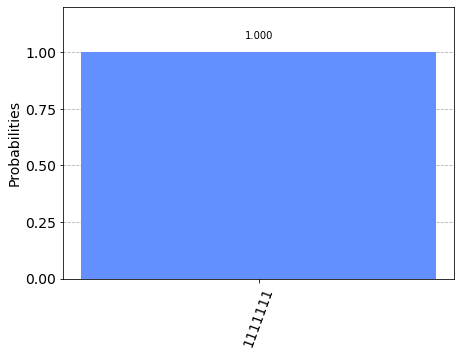

In [ ]:
aer_sim=Aer.get_backend('aer_simulator')
transpiled_dj_circuit = transpile(circuit, aer_sim)
qobj = assemble(transpiled_dj_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

In [ ]:
#Since,the probablity of getting 0000000 in measurment is zero, the input boolean function(which is choosen randomly) is a Constant function. 